<a href="https://colab.research.google.com/github/fabriziobasso/Time_Series_Files/blob/main/Beijing_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing price in Beijing**
Housing price of Beijing from 2011 to 2017, fetching from Lianjia.com

### **About Dataset**
**Context**: Housing price of Beijing from 2011 to 2017, fetching from Lianjia.com

### **Content**
It includes URL, ID, Lng, Lat, CommunityID, TradeTime, DOM(days on market), Followers, Total price, Price, Square, Living Room, number of Drawing room, Kitchen and Bathroom, Building Type, Construction time. renovation condition, building structure, Ladder ratio( which is the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average), elevator, Property rights for five years（It's related to China restricted purchase of houses policy), Subway, District, Community average price.

Most data is traded in 2011-2017, some of them is traded in Jan,2018, and some is even earlier(2010,2009)

All the data was fetching from https://bj.lianjia.com/chengjiao.

**Acknowledgements**

All the data was fetching from Lianjia

**Inspiration**

It may help you predict the housing price of Beijing.

### **Geography Data**:

Beijing Districts boundaries have been downloaded from: [Link](https://cartographyvectors.com/map/1140-beijing-municipality)

## 1.0 Install Packages:

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
!pip install catboost
#!pip install haversine
#!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
!pip install pygam
!pip install keras-tuner --upgrade
!pip install pycaret
#Install Geopandas
!pip install geopandas

## **2.0 Packages**

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
from itertools import combinations
import IPython
import IPython.display

import geopandas as gpd

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import missingno as msno
import imblearn

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
import pycaret

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 16.688557863235474 sec


In [3]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
#print(f"statsmodels: {stm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
print(f"CatBoost: {cat.__version__}")
print(f"PyCaret: {pycaret.__version__}")
print(f"GeoPandas: {gpd.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.12.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 1.7.6
CatBoost: 1.2
PyCaret: 3.0.4
GeoPandas: 0.13.2


Seeding:

In [4]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)

SEED = 42
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.compat.v1.set_random_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

seed_everything(SEED)

### **2.1 Connect Drives**

Verify System:

In [5]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [6]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Beijing_housing"
folder_train_valid = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Beijing_housing/train_valid_data"
models_folders = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/Beijing_housing"
folders_nn = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/Beijing_housing/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/Beijing_housing/tree_based_models/"

list_directories = [folder_data,folder_train_valid,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Beijing_housing already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Beijing_housing/train_valid_data already exists
/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/Beijing_housing already exists
/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/Beijing_housing/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/Beijing_housing/tree_based_models/ already exists


### 2.2 Utility Functions:

In [8]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

## **3.0 Import Data**

## The weather dataset

This tutorial uses a <a href="https://www.bgc-jena.mpg.de/wetter/" class="external">weather time series dataset</a> recorded by the <a href="https://www.bgc-jena.mpg.de" class="external">Max Planck Institute for Biogeochemistry</a>.

This dataset contains 14 different features such as air temperature, atmospheric pressure, and humidity. These were collected every 10 minutes, beginning in 2003. For efficiency, you will use only the data collected between 2009 and 2016. This section of the dataset was prepared by François Chollet for his book <a href="https://www.manning.com/books/deep-learning-with-python" class="external">Deep Learning with Python</a>.

In [9]:
custom_date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d') # %H:%M:%S
path = "Beijing_housing.csv"
df = pd.read_csv(path,
                 encoding='gb2312',
                 parse_dates=['tradeTime'],
                 date_parser=custom_date_parser
                 )
# Slice [start:stop:step], starting from index 5 take every 6th record. --> This is because
# only Hourly data are considered while the original dataset is in minutes

#df = df[5::6]
df.drop(["url","id","price"],axis=1,inplace=True)
#date_time = df.pop('Date Time')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Lng                  318851 non-null  float64       
 1   Lat                  318851 non-null  float64       
 2   Cid                  318851 non-null  int64         
 3   tradeTime            318851 non-null  datetime64[ns]
 4   DOM                  160874 non-null  float64       
 5   followers            318851 non-null  int64         
 6   totalPrice           318851 non-null  float64       
 7   square               318851 non-null  float64       
 8   livingRoom           318851 non-null  object        
 9   drawingRoom          318851 non-null  object        
 10  kitchen              318851 non-null  int64         
 11  bathRoom             318851 non-null  object        
 12  floor                318851 non-null  object        
 13  buildingType  

In [11]:
df.isna().sum()

Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

<Axes: >

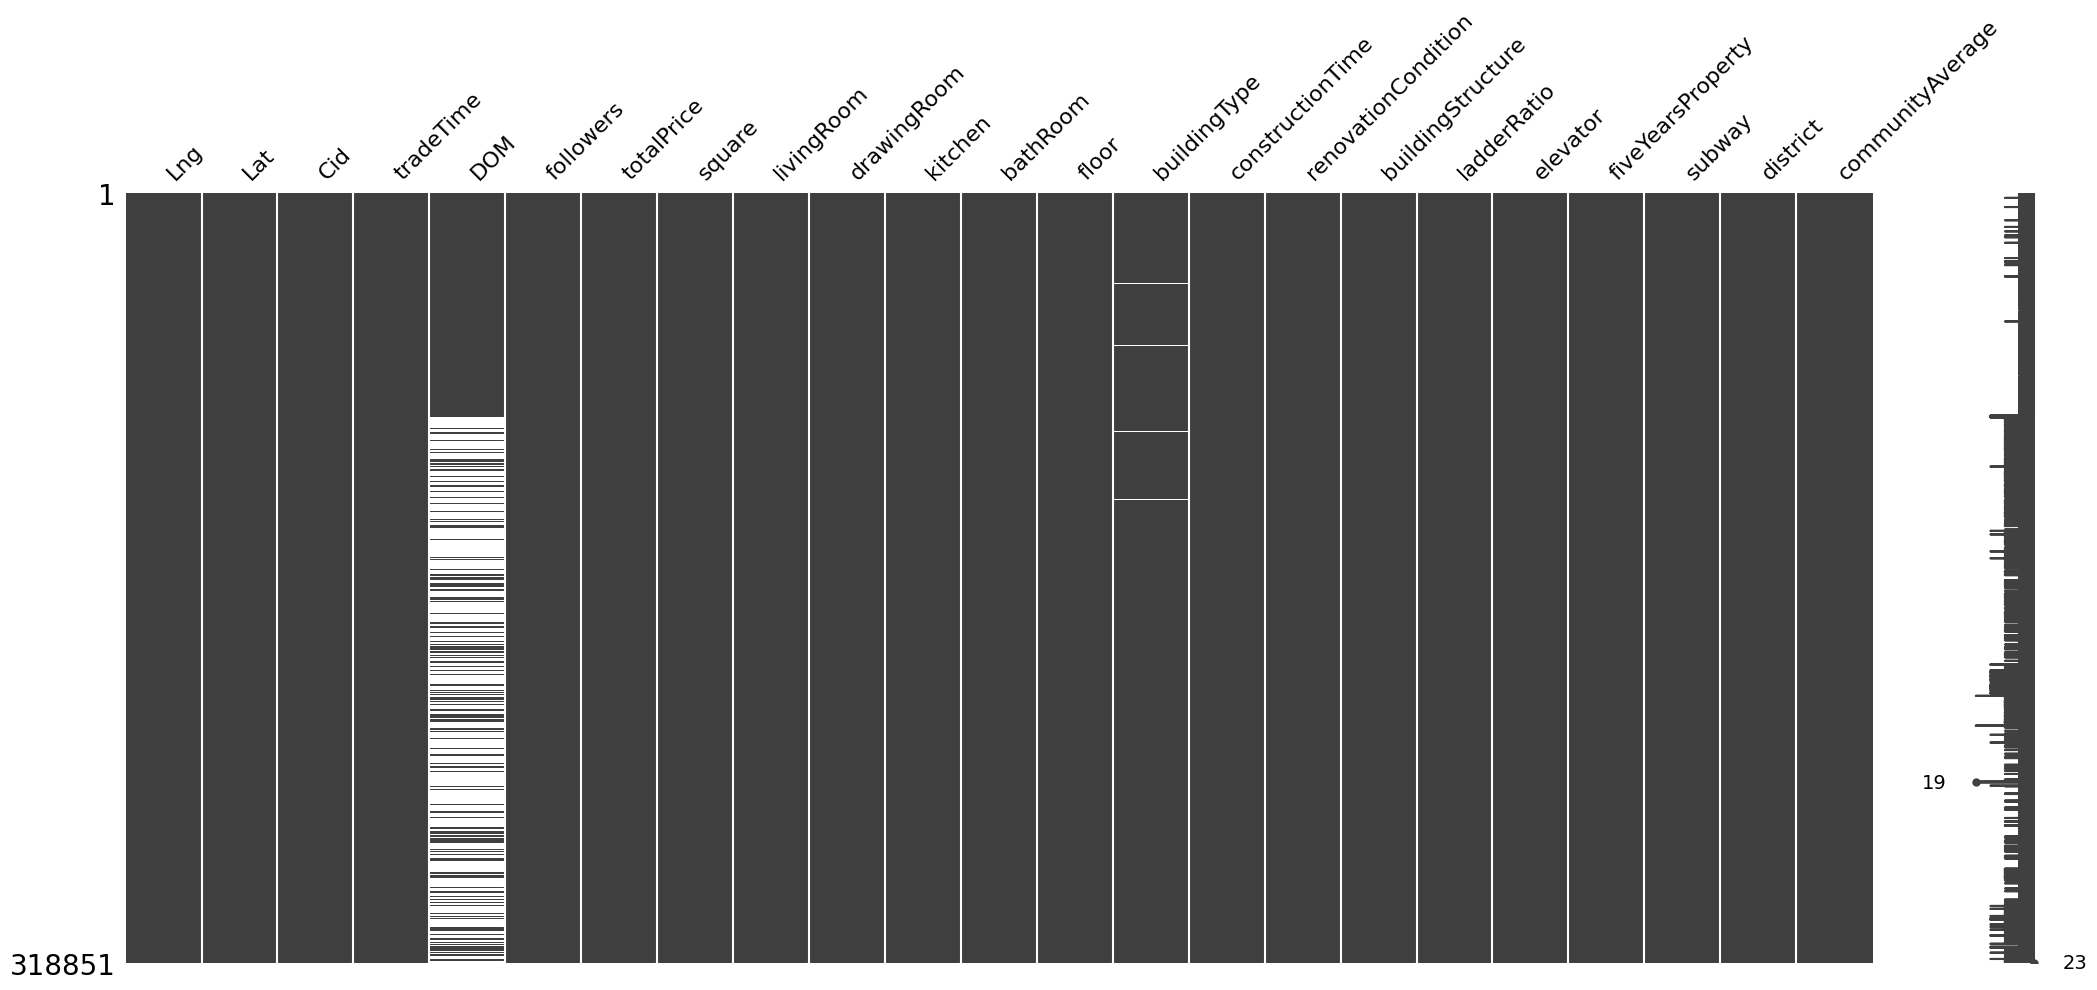

In [12]:
msno.matrix(df)

### 3.1 Features Modification: Year and Month

Year and month of transaction are extracted to create two indipendent features:

In [13]:
df.head(3).tradeTime[0].year
df["Year"] = df.tradeTime.apply(lambda x: x.year)
df["Month"] = df.tradeTime.apply(lambda x: x.month)

### 3.2 Floor Transformation

The Feature *floor* has as entry two parts:

- The location of the property on the floor denoted by a Chinese caracter
- The actual Floor

In [14]:
df["floor"].unique()[:10]

array(['高 26', '高 22', '中 4', '底 21', '中 6', '中 8', '高 6', '高 10', '中 23',
       '底 11'], dtype=object)

The two feature are split in two different variables, *Floor* and and *floor_pos*:

In [15]:
df["Floor"] = [i[0] for i in df["floor"]]#df.floor.apply(lambda x: x.split()[0])
replace_Floor_dict = {"中":"Central","高":"High",
                      "低":"Low","顶":"Top","底":"End",
                      "未":"Central",
                      "钢":"Steel","混":"Mix"}

df["Floor"].replace(replace_Floor_dict, inplace=True)
df["Floor"].value_counts()

Central    121103
High        70094
Low         64136
Top         37406
End         26080
Steel          17
Mix            15
Name: Floor, dtype: int64

In [16]:
df["Floor"].isna().sum()

0

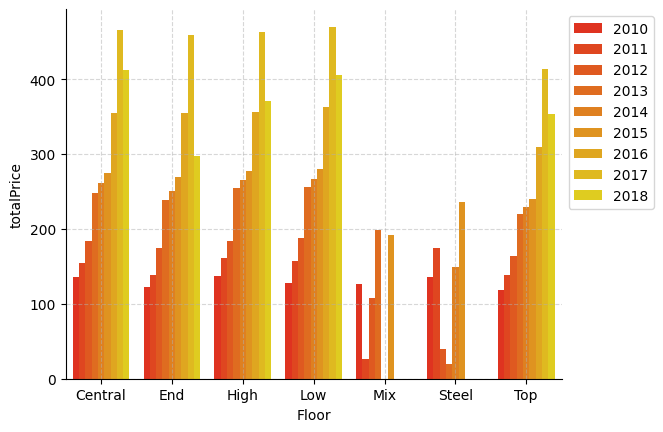

In [80]:
test_floor = df[df.Year>2009].groupby(["Floor","Year"], as_index=False)["totalPrice"].median()
sns.barplot(data=test_floor, x="Floor", y="totalPrice", hue="Year", palette="autumn")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));
plt.grid(linestyle="--", alpha=0.5)

In [17]:
df["Floor_pos"] = [i[-2:] for i in df["floor"]]
df["Floor_pos"].value_counts()

 6    107791
18     23013
16     15999
24     13594
 5     13467
20     10025
 7      9961
11      9643
22      9228
12      9118
21      9018
14      8837
28      7449
15      7283
 9      7109
26      6886
25      6403
10      5707
17      5233
27      4854
19      4721
13      4311
23      3539
 4      3023
32      2477
30      2472
 8      2342
29      1836
 3      1098
31       670
33       571
34       555
 1       332
 2       185
42        34
结构        32
37        16
36        12
35         4
57         2
63         1
Name: Floor_pos, dtype: int64

- Some of the entries have extremely low frequency and therefore they are aggregated in a common lot.  A threshold of "100" Observations is used.
  * 35-36-37 are added to 34.
  * 42-57-63 are merged together.
  * 结构 is replaced with 0.  

In [18]:
rep_dict_0 = {35:34,36:34,37:34}
rep_dict_1 = {57:42,63:42}
rep_dict_2 = {"结构":0}


df["Floor_pos"] = df["Floor_pos"].replace(rep_dict_0)
df["Floor_pos"] = df["Floor_pos"].replace(rep_dict_1)
df["Floor_pos"] = df["Floor_pos"].replace(rep_dict_2)
df["Floor_pos"] = df["Floor_pos"].astype(np.int32())

In [19]:
df["Floor_pos"].value_counts()

6     107791
18     23013
16     15999
24     13594
5      13467
20     10025
7       9961
11      9643
22      9228
12      9118
21      9018
14      8837
28      7449
15      7283
9       7109
26      6886
25      6403
10      5707
17      5233
27      4854
19      4721
13      4311
23      3539
4       3023
32      2477
30      2472
8       2342
29      1836
3       1098
31       670
33       571
34       555
1        332
2        185
42        34
0         32
37        16
36        12
35         4
57         2
63         1
Name: Floor_pos, dtype: int64

In [20]:
df["Floor_pos"].isna().sum()

0

### 3.3 Cid

This is a categorical features. It has a high number of of groups.

In [21]:
len(df.Cid.unique())

4035

In [40]:
test_cid = df.groupby("Cid", as_index=False)["totalPrice"].agg(["median","count"]).reset_index()

print(f"Minumun number of transaction per Cid: {test_cid['count'].min(axis=0)}")
print(f"Frequency of Minumun number of transaction per Cid: {test_cid[test_cid['count']==1].count().values[0]}")

print("Mean obs for Cid-s: {}".format(test_cid["count"].mean(axis=0)))
print("percentage of Cid-s with only 1 entry: {}".format(np.round(test_cid[test_cid['count']==1].count().values[0]/len(df.Cid.unique()),4)))
print("percentage of Cid-s with only 2 entry: {}".format(np.round(test_cid[test_cid['count']==2].count().values[0]/len(df.Cid.unique()),4)))

Minumun number of transaction per Cid: 1
Frequency of Minumun number of transaction per Cid: 215
Mean obs for Cid-s: 79.02131350681536
percentage of Cid-s with only 1 entry: 0.0533
percentage of Cid-s with only 2 entry: 0.0399


There are 215 (5.3% of the total) Cid-s with only one observation, and 4% more with only two.

These figures support the removal of this feature.

In [26]:
df[df["Cid"]==1111027373710]

,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,square,livingRoom,drawingRoom,...,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,Year,Month,Floor,Floor_pos
11290,116.410289,39.947906,1111027373710,2016-06-26,20.0,20,152.8,11.5,1,0,...,0.25,0.0,0.0,1.0,1,NaN,2016,6,End,1


Cid-s are just mantained in the dataset for the time being as they might be useful to fill some of the missing values, but it will be later removed.

### 3.4 DOM

This series is affexted by an elevated number of NaNs:

In [85]:
print("Total of NaN in %: {}%".format(np.round(df.DOM.isna().sum()/len(df),3)))

Total of NaN in %: 0.495%


“DOM” (active days on market) has a strong correlation with the result, and it has a huge number of missing values. To retain effective information, we decided to discover a way to fill it: First, we find several features that are highly correlated with it, "Year", "district", and "followers". Then we value the missing values in “DOM” by calculating the average of those data that have the same value in all three characteristics of "tradeYear", "district", "follow_type" as them. Since “followers” is a numeric variable, it is not convenient for grouping, so we convert it into a character variable – “follow_type”.

In [99]:
df_DOM = df.copy()

bins = [-1, 0, 5, 10, 20, 50, 9999]
df_DOM['follow_type'], b = pd.cut(x=df_DOM['followers'],bins=bins,right=True,retbins=True)
df_DOM['DOM'].fillna(df_DOM.groupby(['district', 'Year', 'follow_type'])['DOM'].transform('mean'), inplace=True)

<Axes: >

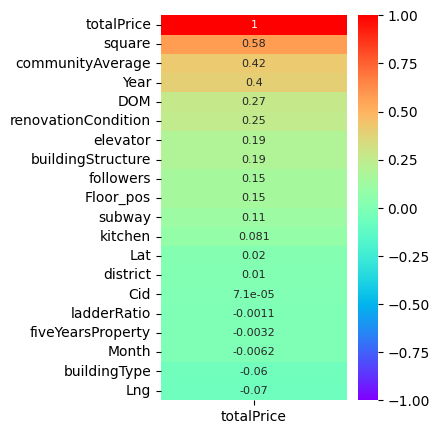

In [100]:
top_features = df_DOM.corr()[['totalPrice']].sort_values(by=['totalPrice'],ascending=False)
plt.figure(figsize=(3,5))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 8},vmin=-1)

In [104]:
df_DOM = df.copy()

df_DOM['follow_type'], b = pd.cut(x=df_DOM['followers'],bins=bins,right=True,retbins=True)
df_DOM['DOM'].fillna(df_DOM.groupby(['district', 'Year', 'follow_type'])['DOM'].transform('median'), inplace=True)

<Axes: >

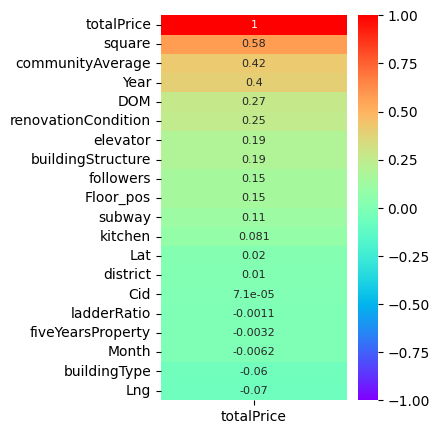

In [105]:
top_features = df_DOM.corr()[['totalPrice']].sort_values(by=['totalPrice'],ascending=False)
plt.figure(figsize=(3,5))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 8},vmin=-1)

The filling with the median seems to have the highest correlation with the target. Therefore, this value is selected for filling the NaN.

In [106]:
df['follow_type'], b = pd.cut(x=df['followers'],bins=bins,right=True,retbins=True)
df['DOM'].fillna(df.groupby(['district', 'Year', 'follow_type'])['DOM'].transform('median'), inplace=True)

### 3.5 buildingType

There are 2021 missing values:

In [108]:
df.buildingType.isna().sum()

2021

Moreover. there are a number of entries that are not consistent with the rest of the series. All the fractional entries are replaced with NaN

In [113]:
df.buildingType.value_counts()

4.000    172405
1.000     84541
3.000     59715
2.000       137
0.500        15
0.333         5
0.048         4
0.125         3
0.250         2
0.429         1
0.375         1
0.667         1
Name: buildingType, dtype: int64

In [121]:
build_type = []

for type in df["buildingType"]:
  if type not in [1.,2.,3.,4.]:
    type=np.nan

  build_type.append(type)
df["buildingType"]=build_type

In [122]:
df.buildingType.value_counts()

4.0    172405
1.0     84541
3.0     59715
2.0       137
Name: buildingType, dtype: int64

In [123]:
df.buildingType.isna().sum()

2053

<Axes: xlabel='Lng', ylabel='Lat'>

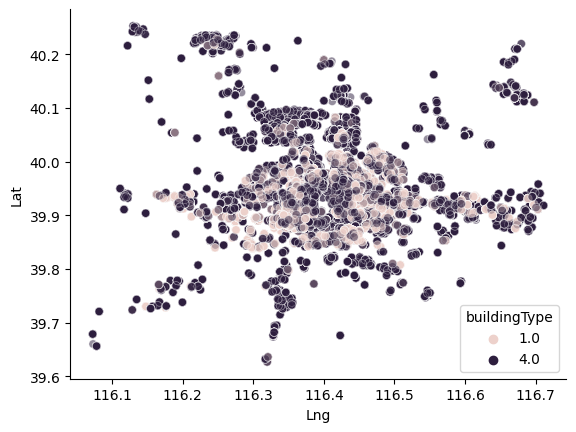

In [136]:
sns.scatterplot(data=df[(df.buildingType==1.0)|(df.buildingType==4.0)], x="Lng", y="Lat", hue="buildingType", alpha=0.5)

In [48]:
dt = df.groupby(['Year', 'Month'])['totalPrice'].mean().reset_index()
dt.drop(dt[dt['Year']<2010].index, inplace=True) # the years prior to 2010 only have a few points, while the ones after have at least one for every month
dt['tradeTime'] = list(zip(dt.Year, dt.Month))
dt.reset_index(inplace=True)

In [49]:
dt

,index,Year,Month,totalPrice,tradeTime
0,5,2010,1,102.125000,"(2010, 1)"
1,6,2010,2,105.426667,"(2010, 2)"
2,7,2010,3,109.810811,"(2010, 3)"
3,8,2010,4,144.603571,"(2010, 4)"
4,9,2010,5,135.000000,"(2010, 5)"
...,...,...,...,...,...
92,97,2017,9,513.077627,"(2017, 9)"
93,98,2017,10,489.644415,"(2017, 10)"
94,99,2017,11,502.104211,"(2017, 11)"
95,100,2017,12,488.391819,"(2017, 12)"


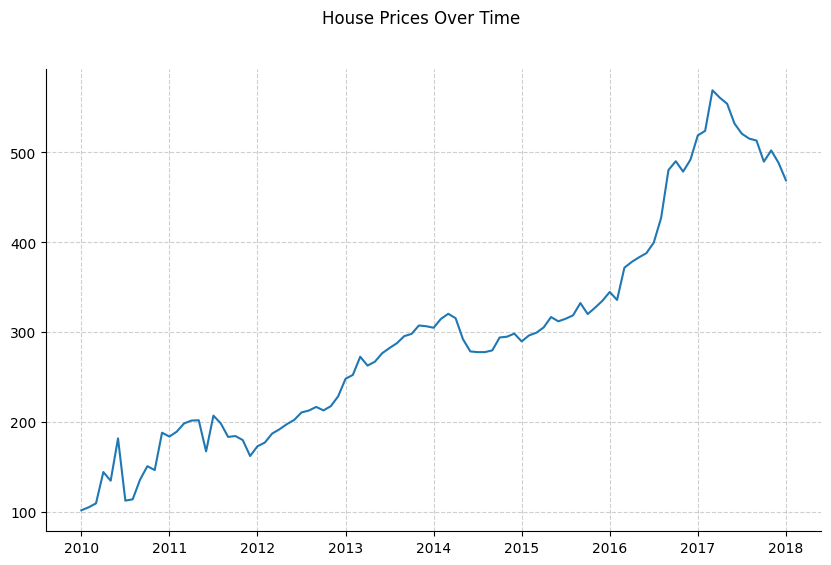

In [62]:
# Plot it with the right x ticks
fig = plt.figure(figsize=(10,6))
fig.suptitle('House Prices Over Time', fontsize=12)
plt.plot(dt['totalPrice'])
plt.grid(linestyle="--", alpha=0.6)
plt.xticks(np.arange(0, len(dt['tradeTime'].unique()), 12), labels=range(2010, 2019))
plt.show()